## 1D Diffusion exercise

#### Import Statements

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib.animation import FuncAnimation
PI = math.pi

#### Object Definitions

In [5]:
class particle(object):

    def __init__(self, radius, position, ID):
        self._radius = radius
        self._position = position
        self._ID = ID

    #getters
    @property
    def radius(self):
        return self._radius

    @property
    def position(self):
        return self._position
    
    @property
    def ID(self):
        return self._ID

    #setters
    @radius.setter
    def radius(self,value):
        self._radius = value
    
    @position.setter
    def position(self,value):
        self._position=value
    
    @ID.setter
    def ID(self,value):
        self._ID=value

    #deleters
    @radius.deleter
    def radius(self):
        del self._radius
    
    @position.deleter
    def position(self):
        del self._position
    
    @ID.deleter
    def ID(self):
        del self._ID

#### Method definitions

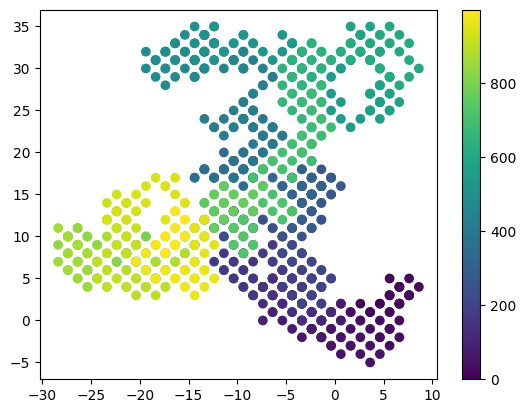

In [6]:
#method to obtain the position of a particle
def getParticlePosition(particle_name):
    return particle_name.position

#method to change position of particle by a unit step 
def moveParticle(particle_name,step):
    particle_x = getParticlePosition(particle_name)[0]
    particle_y = getParticlePosition(particle_name)[1]
    particle_name.position = (particle_x + random.choice([-1,1])*step,particle_y + random.choice([-1,1])*step)

#places particle randomly from -1 to 1 in 2D space
def placeParticle(particle_list, n):

    #create a particle object using this position
    for i in range(n):
        initial_positionx = np.random.uniform(-1,1)
        initial_positiony = np.random.uniform(-1,1)
        x=particle(2.5, (initial_positionx,initial_positiony),i)
        particle_list.append(x)

#prints particle ID
def printID(particle_name):
    print(particle_name.ID)
        
#plots particle position as a colored time series
def plotColorSpec(lx,ly):
    length=len(lx)
    t = np.arange(length)
    plt.scatter(lx,ly,c=t)
    plt.show()

#create a simulation function
def simulation(steps,numparticles):
    particle_list = []
    #initialize your particles
    placeParticle(particle_list,numparticles)

    positions = []
    
    for i in range(len(particle_list)):
        posix=[]
        posiy=[]
        for j in range(steps):
            moveParticle(particle_list[i],1)
            coordx = getParticlePosition(particle_list[i])[0]
            coordy = getParticlePosition(particle_list[i])[1]
            posix.append(coordx)
            posiy.append(coordy)
        positions.append([posix,posiy])
    
    #for i in range(numparticles):
    #    plt.plot(positions[i][0],positions[i][1])
    #    plotColorSpec(positions[i][0],positions[i][1])

    x = np.asarray(positions)[0][0,:]
    y = np.asarray(positions)[0][1,:]

    t = np.arange(len(x))
    plt.scatter(x,y,c=t)
    plt.colorbar()

    return [x,y]

#run the simulation and store the data in X and Y
[x,y] = simulation(1000,1)



#### 1D Walk

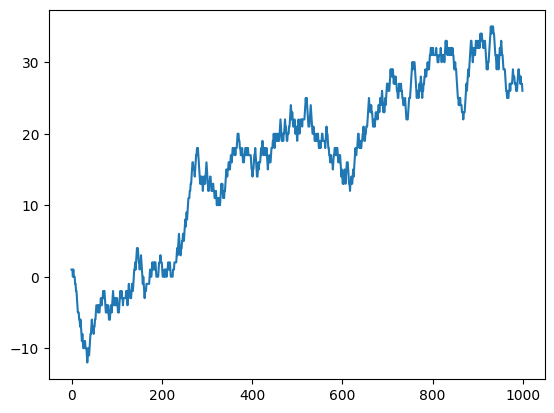

In [8]:
def step(particle):
    return particle+random.choice([-1,0,1])

def go(n):
    p=0
    l=[]
    for i in range(n):
        p=step(p)
        l.append(p)
    return l


plt.plot(go(1000))

#### Animating the 2D random walk

MovieWriter ffmpeg unavailable; using Pillow instead.


<_io.TextIOWrapper name='test.gif' mode='r' encoding='UTF-8'>

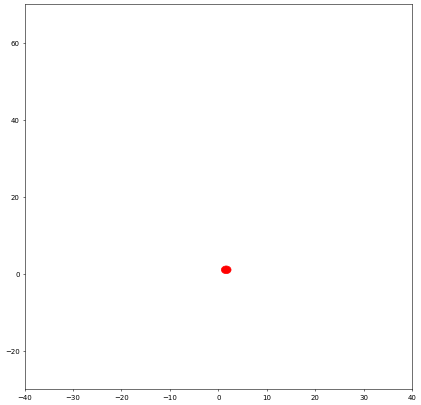

In [12]:
from matplotlib.animation import FuncAnimation
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import random

#create our figure for the animation
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
fig.set_dpi(50)

def animate(i):

    ax.clear()

    x_pos = x[i]
    y_pos = y[i]

    Drawing_colored_circle = plt.Circle((x_pos,y_pos),1,color='red')
    ax.add_artist( Drawing_colored_circle)

    plt.xlim([-40,40])
    plt.ylim([-30,70])

ani = FuncAnimation(fig,animate,frames=100,interval=1,repeat=False)

ani.save('test.gif')